In [1]:
import torch

In [2]:
print('torch version', torch.__version__) # Print the installed version

torch version 2.6.0


### Python nested list to tensor

In [3]:
my_values = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_tensor = torch.Tensor(my_values)

In [4]:
print("my_tensor class:", type(my_tensor))
print(my_tensor)

my_tensor class: <class 'torch.Tensor'>
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


## Tensor Attributes
#### Tensor() class has attributes that provide us info such as 
- **.shape** for dimension
- **.dtype** for data types of values stored inside the tensor

In [5]:
print("my_tensor shape: ", my_tensor.shape)
print("my_tensor data type: ", my_tensor.dtype)

my_tensor shape:  torch.Size([4, 3])
my_tensor data type:  torch.float32


### Device for Tensor
#### Tensors also have a **.device** attributes, which specifies that hardware on which it's stored. By default it's created on computer's CPU

In [6]:
print("my_tensor device: ", my_tensor.device)

my_tensor device:  cpu


### Check for GPU availability 
- **cuda** for windows & linux
- **mps** for macOS

In [7]:
cuda_gpus_available = torch.cuda.is_available()
mps_gpus_available = torch.backends.mps.is_available()
print("cuda GPUs available:", cuda_gpus_available)
print("mps GPUs available:", mps_gpus_available)

cuda GPUs available: False
mps GPUs available: True


#### Change the device of `my_tensor` to `mps`

In [8]:
my_tensor = my_tensor.to('mps')
print("my_tensor device:", my_tensor.device)

my_tensor device: mps:0


### Tensor Slicing
#### We can manipulate tensors through several ways. **Slicing** techniques, where we use square brackets `[]` and indexing to select a subset of the values in a tensor.

In [9]:
left_tensor = my_tensor[:2, :] # tensor[rows, columns]
right_tensor = my_tensor[2:, :]
print(left_tensor)
print(right_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='mps:0')
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]], device='mps:0')


### Tensor Math
#### Another way to manipulate tensors is to use mathematical operations. For example
- `+` operator or the `add` method to perform addition

In [10]:
summed_tensor_operator = left_tensor + right_tensor
summed_tensor_method = left_tensor.add(right_tensor)
print('left tensor + right tensor = ', summed_tensor_operator)
print('left_tensor.add(right_tensor) : ', summed_tensor_method)

left tensor + right tensor =  tensor([[ 8., 10., 12.],
        [14., 16., 18.]], device='mps:0')
left_tensor.add(right_tensor) :  tensor([[ 8., 10., 12.],
        [14., 16., 18.]], device='mps:0')


#### Important mathematical operator used in deep learning is multiplication.
Multiplication are of two types
- **element-wise multiplication** using `*` operator or the `.mul` method.

In [11]:
ew_tensor_operator = left_tensor * right_tensor
ew_tensor_method = left_tensor.mul(right_tensor)

print(ew_tensor_operator)
print(ew_tensor_method)

tensor([[ 7., 16., 27.],
        [40., 55., 72.]], device='mps:0')
tensor([[ 7., 16., 27.],
        [40., 55., 72.]], device='mps:0')


`Note: element-wise multiplication is commutative i.e left_tensor * right_tensor equals to right_tensor * left_tensor unlike matrix multiplication`

In [12]:
left_tensor * right_tensor == right_tensor * left_tensor

tensor([[True, True, True],
        [True, True, True]], device='mps:0')

- **matrix multiplication** using `@` operator or `.matmul()` method

In [13]:
new_left_tensor = torch.Tensor([[2, 5], [7, 3]]) # 2x2 matrix tensor
new_right_tensor = torch.Tensor([[8], [9]]) # 2x1 matrix tensor

mm_tensor_operator = new_left_tensor @ new_right_tensor
mm_tensor_method = new_left_tensor.matmul(new_right_tensor)

print(mm_tensor_operator)
print(mm_tensor_method)

tensor([[61.],
        [83.]])
tensor([[61.],
        [83.]])


` Note: matrix multiplication is not commutative i.e. left_tensor @ right_tensor != right_tensor @ left_tensor unlike element-wise multiplication `

In [14]:
# mm_tensor_operator = new_right_tensor @ new_left_tensor 
# will give errors due to dimension mismatches

Note: Matrix multiplication is the way our model will train & make prediction, & **dimension mismatches** will be a common source of bugs when we start building models. For that reason, it's always important to check the shape of our tensors.

### Mean
#### **.mean()** computes a mean for all values in tensor
-  `dim=[0]` gives mean for each columns
-  `dim=[1]` gives mean for each rows
-  `dim=None` calculates mean for all values

In [15]:
my_tensor_column_mean = my_tensor.mean(dim=[0]) 
my_tensor_row_mean = my_tensor.mean(dim=[1]) 
my_tensor_mean = my_tensor.mean() 
print("Column Mean: ", my_tensor_column_mean)
print("Row Mean: ",my_tensor_row_mean)
print("Mean: ",my_tensor_mean)

Column Mean:  tensor([5.5000, 6.5000, 7.5000], device='mps:0')
tensor([ 2.,  5.,  8., 11.], device='mps:0')
tensor(6.5000, device='mps:0')


### Explore Files
#### Assign Trainning Path

import os

In [16]:
# !gcloud storage ls gs://wqu-cv-course-datasets
# gcloud storage cp gs://wqu-cv-course-datasets/project1assignment.tgz . --no-clobber

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data_dir = os.path.join('data_p1','data_multiclass')
train_dir = os.path.join(data_dir, 'train')

print("Data directory:", data_dir)
print("Training data directory", train_dir)

Data directory: data_p1/data_multiclass
Training data directory data_p1/data_multiclass/train


#### List Directory Content

In [19]:
class_directories = os.listdir(train_dir)
print("class_directories length:", len(class_directories)) # Print no. of files 
print(class_directories)

class_directories length: 9
['.DS_Store', 'leopard', 'blank', 'monkey_prosimian', 'bird', 'hog', 'antelope_duiker', 'rodent', 'civet_genet']


In [20]:
# couldn't remove due to idk problem
# os.remove('.DS_Store')

#### Class Distribution Mapping

In [21]:
class_distributions_dict = {}
for subdirectory in class_directories:
    if(subdirectory != '.DS_Store'): # causing problems in mac
        dir = os.path.join(train_dir, subdirectory)
        files = os.listdir(dir)
        num_files = len(files)
        class_distributions_dict[subdirectory] = num_files

class_distributions = pd.Series(class_distributions_dict)
print(class_distributions)

leopard             2254
blank               2213
monkey_prosimian    2492
bird                1641
hog                  978
antelope_duiker     2474
rodent              2013
civet_genet         2423
dtype: int64


### Bar chart from `class_distribution`

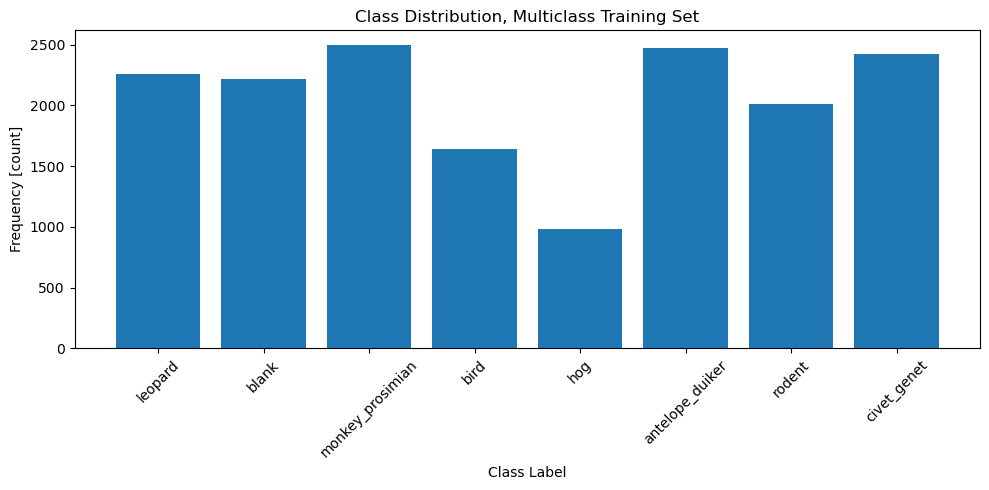

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(class_distributions.index, class_distributions.values)
ax.set_xlabel("Class Label")
ax.set_ylabel("Frequency [count]")
ax.set_title("Class Distribution, Multiclass Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Load Images

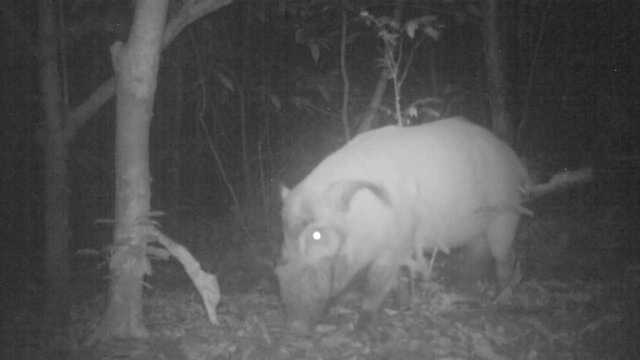

In [23]:
hog_image_path = os.path.join(train_dir, "hog","ZJ000072.jpg")

# We use Pillow library(aka PIL) for loading this image
import PIL
from PIL import Image
hog_image_pil = Image.open(hog_image_path)
hog_image_pil

In [24]:
hog_image_pil_size = hog_image_pil.size
hog_image_pil_mode = hog_image_pil.mode
print("Hog image size:", hog_image_pil_size)
print("Hog image mode: ", hog_image_pil_mode) # L indicates grayscale while color mode is RGB

Hog image size: (640, 360)
Hog image mode:  L


Antelope image size:  (960, 540)
Antelope image mode:  RGB


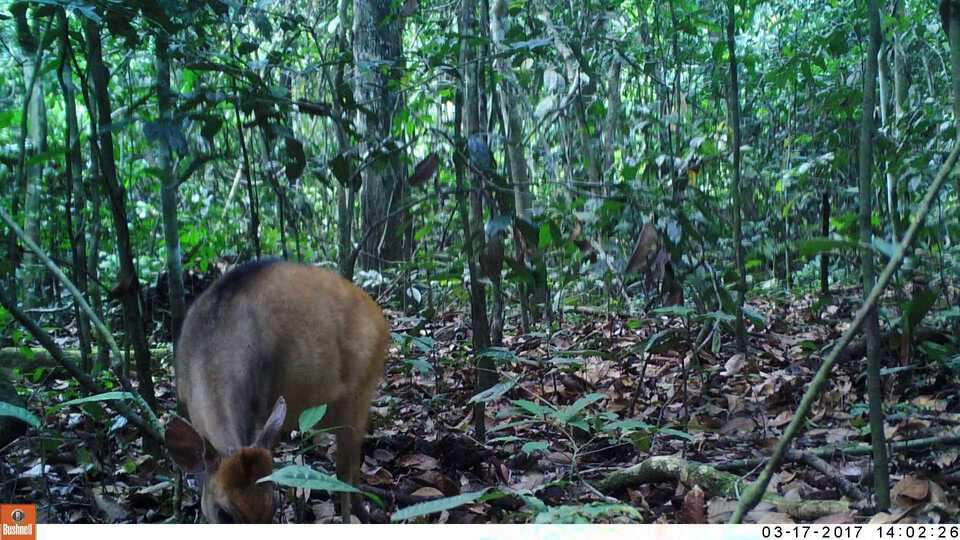

In [25]:
antelope_image_path = os.path.join(train_dir, "antelope_duiker", "ZJ002533.jpg")
antelope_image_pil = Image.open(antelope_image_path)
antelope_image_pil_size = antelope_image_pil.size
antelope_image_pil_mode = antelope_image_pil.mode
print("Antelope image size: ", antelope_image_pil_size)
print("Antelope image mode: ", antelope_image_pil_mode)
antelope_image_pil

### Load Tensor
If we want to tran a model we need to represent them as tensor. Pollow library represent it using JpegImageFile() class

In [26]:
import torchvision
from torchvision import transforms

In [36]:
hog_tensor = transforms.ToTensor()(hog_image_pil)
antelope_tensor = transforms.ToTensor()(antelope_image_pil)
print("hog tensor shape: ", hog_tensor.shape) # 1 indicates color channel
print("antelope tensor shape: ", antelope_tensor.shape) # 3 indicates color channel
# both tensors are in 3 dimensions [color channel, height, width] format

hog tensor shape:  torch.Size([1, 360, 640])
antelope tensor shape:  torch.Size([3, 540, 960])


`Note: ToTensor() is a class. However, we're using it like a function, combining it with another set of parenthesis that contains hog_image_pill as if it was an argument.
The reason this works is that the ToTensor() class definition includes a __call__ method. This allows us to use the class like a function. Keep this in mind for the next lesson, where we'll create our own class for transforming images.` 

Text(0.5, 1.0, 'Hog, grayscale')

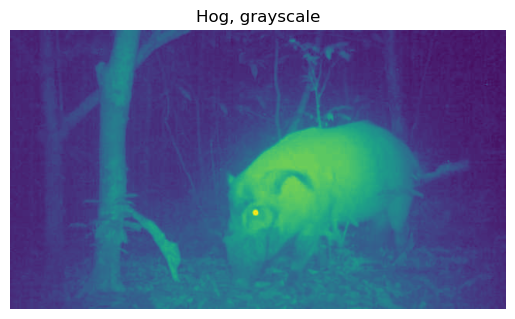

In [41]:
fig, ax = plt.subplots(1, 1)
ax.imshow(hog_tensor[0, :, :])
ax.axis("off")
ax.set_title("Hog, grayscale")

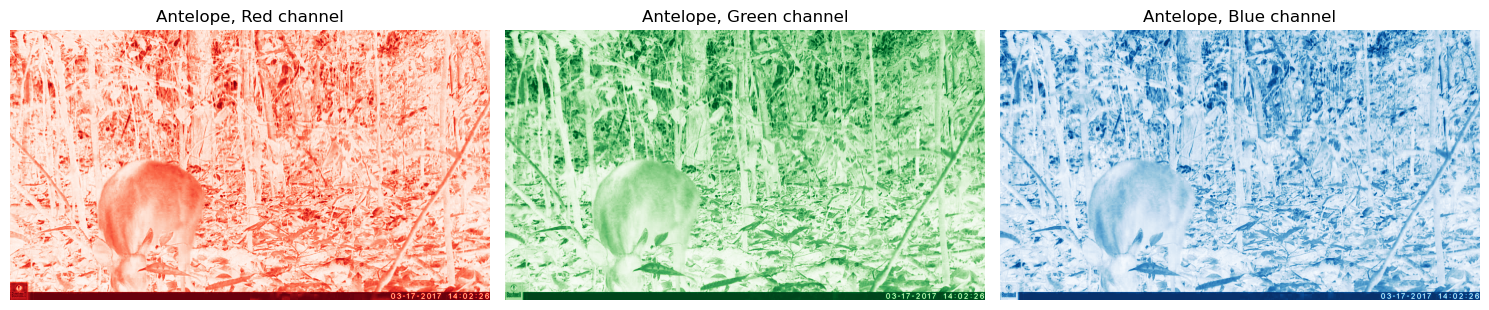

In [46]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

#red channel
red_channel = antelope_tensor[0, :, :]
ax0.imshow(red_channel, cmap="Reds")
ax0.set_title("Antelope, Red channel")
ax0.axis("off")

#Green channel
green_channel = antelope_tensor[1, :, :]
ax1.imshow(green_channel, cmap="Greens")
ax1.set_title("Antelope, Green channel")
ax1.axis("off")

#Blue channel
blue_channel = antelope_tensor[2, :, :]
ax2.imshow(blue_channel, cmap="Blues")
ax2.set_title("Antelope, Blue channel")
ax2.axis("off")

plt.tight_layout()

In [48]:
max_channel_values = antelope_tensor.amax()
min_channel_values = antelope_tensor.amin()
print("Max value of antelope tensor: ", max_channel_values)
print("Min value of antelope tensor: ", min_channel_values)

Max value of antelope tensor:  tensor(1.)
Min value of antelope tensor:  tensor(0.)


We can see that the values in the tensor range from 0 to 1. 0 means that the color intensity at a particular pixel is 0%; 1 means intensity is 100%

In [49]:
mean_channel_values = antelope_tensor.mean(dim=[1, 2]) # first dimension contains color channel values therefore